<div style="border:solid green 2px; padding: 20px">
<b>Владимир, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# **Описание данных**:
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint

from pymystem3 import Mystem
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
#прочтём данные и посмотрим на них, вывдем первые и последние 10 строк датасета
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#получим сводку числовых значений в вашем наборе данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
#получим информацию о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
#проверим наличие дубликатов
df.duplicated().sum()

0

### Вывод

- прыгающий регистр в названии столбцов
- отсутствует много значений
- имеются некорректные типы данных
- неудобная группировка столбцов
- названия некоторых столбцов необходимо выполнить в змеином регистре
- апартаменты, с ними определённо что-то не так

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Первичные данные посмотрели, давай теперь их обработаем, ведь у нас есть план 😊. 
</div>

## Предобработка данных

In [7]:
#приведём названия столбцов в порядок
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [8]:
#переименуем 
cols = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'town_name',
        'nearest_airport_distance_m',
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_number_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']
df.set_axis(cols, axis='columns')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
    
Лучше всего переопределять переменные. 
    
</div>

In [9]:
#проверим изменения
df.columns.tolist()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height_m',
 'total_floors_in_house',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'number_of_balconies',
 'town_name',
 'nearest_airport_distance_m',
 'city_center_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m',
 'days_exposition']

In [10]:
#теперь посмотрим количество пропущенных значений, отсортируем их в порядке возрастания и получим общее кол-во
df.isna().sum().sort_values()


total_images                      0
is_open_plan                      0
floor                             0
number_of_rooms                   0
is_studio                         0
total_area_m2                     0
last_price                        0
first_day_exposition              0
town_name                        49
total_floors_in_house            86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_number_within_3km        5518
parks_numbers_within_3km       5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m               9195
number_of_balconies           11519
nearest_pond_distance_m       14589
nearest_park_distance_m       15620
is_apartment                  20924
dtype: int64

In [11]:
#оценим пропуски в % соотношении 
#пропуски выглядят некритично, пользователи могут не знать точное расстояние до объектов,а так же высоту потолков
df.isna().sum().sort_values()/df.shape[0]*100

total_images                   0.000000
is_open_plan                   0.000000
floor                          0.000000
number_of_rooms                0.000000
is_studio                      0.000000
total_area_m2                  0.000000
last_price                     0.000000
first_day_exposition           0.000000
town_name                      0.206760
total_floors_in_house          0.362885
living_area_m2                 8.029875
kitchen_area_m2                9.612220
days_exposition               13.422507
ponds_number_within_3km       23.283683
parks_numbers_within_3km      23.283683
city_center_distance_m        23.287902
nearest_airport_distance_m    23.384953
ceiling_height_m              38.799105
number_of_balconies           48.605426
nearest_pond_distance_m       61.559559
nearest_park_distance_m       65.909954
is_apartment                  88.290645
dtype: float64

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Классный способ посчитать доли пропущенных значений 👍
    
Оставил пример ниже как это можно сделать еще.
    
</div>

In [12]:
df.isna().mean() * 100

total_images                   0.000000
last_price                     0.000000
total_area_m2                  0.000000
first_day_exposition           0.000000
number_of_rooms                0.000000
ceiling_height_m              38.799105
total_floors_in_house          0.362885
living_area_m2                 8.029875
floor                          0.000000
is_apartment                  88.290645
is_studio                      0.000000
is_open_plan                   0.000000
kitchen_area_m2                9.612220
number_of_balconies           48.605426
town_name                      0.206760
nearest_airport_distance_m    23.384953
city_center_distance_m        23.287902
parks_numbers_within_3km      23.283683
nearest_park_distance_m       65.909954
ponds_number_within_3km       23.283683
nearest_pond_distance_m       61.559559
days_exposition               13.422507
dtype: float64

In [13]:
#поменяем расположение столбцов для более наглядного чтения данных в таблице
df = df[[
 'town_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

In [14]:
#проверим результат
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


In [15]:
#уберём метры из столбцов с прудами, аэропортами и центрами городам, приведем все к километрам, так гораздо удобнее считать
df['city_center_distance_km'] = df['city_center_distance_m'] / 1000
df['nearest_airport_distance_km'] = df['nearest_airport_distance_m'] / 1000
df['nearest_park_distance_km'] = df['nearest_park_distance_m'] / 1000
df['nearest_pond_distance_km'] = df['nearest_pond_distance_m'] / 1000

In [16]:
#удалим старые
del df['city_center_distance_m']
del df['nearest_airport_distance_m']
del df['nearest_park_distance_m']
del df['nearest_pond_distance_m']

In [17]:
#проверим результат
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,parks_numbers_within_3km,ponds_number_within_3km,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,1.0,2.0,16.028,18.863,0.482,0.755
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,0.0,0.0,18.603,12.817,NaN,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,1.0,2.0,13.933,21.741,0.090,0.574
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,2.0,3.0,6.800,28.098,0.084,0.234
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,2.0,1.0,8.098,31.856,0.112,0.048


In [18]:
#поменяем расположение столбцов
df = df[[
 'town_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'parks_numbers_within_3km',
 'nearest_park_distance_km',
 'ponds_number_within_3km',
 'nearest_pond_distance_km'
]]

In [19]:
#проверим
df.head()
#идеально

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,16.028,18.863,1.0,0.482,2.0,0.755
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,18.603,12.817,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,13.933,21.741,1.0,0.090,2.0,0.574
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,6.800,28.098,2.0,0.084,3.0,0.234
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,8.098,31.856,2.0,0.112,1.0,0.048


In [20]:
#пройдемся по столбцам, которые нужны, чтобы решить задачу. 
#начнем с города.
#множество населённых пунктов, посмотрим что будет, если изменить регистр букв
len(df['town_name'].unique())

365

In [21]:
df['town_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

есть населённые пункты с "е" и "ё", а так же странные названия населённых пунктов напоминающие остановки поезда ил электрички, пока не будем ничего трогать, нет возможности уточнить данные

In [22]:
#заменим ё на е
df['town_name'] = df['town_name'].str.replace('ё', 'е', regex=True)

In [23]:
#посчитаем кол-во уникальных значений 
#избавились от 34 дублей
len(df['town_name'].unique())

331

In [24]:
#удалим пропущенные значения 
df['town_name'].isna().sum()

49

In [25]:
#удалим строки без города, они будут мешать в анализе и даже пользователям такие объявления не нужны,
#такие данные не дают должного представления о нахождении жилья
df = df.dropna(subset=['town_name'])

In [26]:
#итак, кол-во пропусков?
df['town_name'].isna().sum()

0

In [27]:
#теперь день публикации приведём в человеческий вид
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [28]:
#проверим результат
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07,NaN,16.028,18.863,1.0,0.482,2.0,0.755
1,поселок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04,81.0,18.603,12.817,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20,558.0,13.933,21.741,1.0,0.090,2.0,0.574
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24,424.0,6.800,28.098,2.0,0.084,3.0,0.234
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19,121.0,8.098,31.856,2.0,0.112,1.0,0.048


In [29]:
#разберёмся с апартаментами
df['is_apartment'].isna().sum()

20890

In [30]:
#заполним булевым значением
df['is_apartment'] = df['is_apartment'].fillna(False)

In [31]:
#проверим
df['is_apartment'].isna().sum()

0

In [32]:
#разберёмся с расстоянием до аэропорта
for town_name in df['town_name'].unique():
      median = df.loc[df['town_name'] == town_name,'nearest_airport_distance_km'].median()
      df.loc[(df['nearest_airport_distance_km'].isna()) & (df['town_name'] == town_name), 'nearest_airport_distance_km'] = median

# все что не заполнилось заполняем общей медианой по Лен. области
df.loc[df['nearest_airport_distance_km'].isna(), 'nearest_airport_distance_km'] = df['nearest_airport_distance_km'].median()

In [33]:
df['nearest_airport_distance_km'].isna().sum()

0

In [34]:
#разберёмся с расстоянием до центра, заполним пропуски средним
df['city_center_distance_km'] = df['city_center_distance_km'].fillna(df['city_center_distance_km'].mean())

In [35]:
#проверим 
df['city_center_distance_km'].isna().sum()

0

In [36]:
#теперь разберёмся с высотой потолков
#посчитаем медиану высоты потолков 
df['ceiling_height_m'].median()

2.65

In [37]:
#теперь заменим пропуски на медиану
df['ceiling_height_m'] = df['ceiling_height_m'].fillna(df['ceiling_height_m'].median())

In [38]:
display(df.head())
#починили

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,False,...,20,13000000.0,2019-03-07,NaN,16.028,18.863,1.0,0.482,2.0,0.755
1,поселок Шушары,40.4,18.6,11.0,2.65,1,2.0,1,11.0,False,...,7,3350000.0,2018-12-04,81.0,18.603,12.817,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,10,5196000.0,2015-08-20,558.0,13.933,21.741,1.0,0.090,2.0,0.574
3,Санкт-Петербург,159.0,NaN,NaN,2.65,3,0.0,9,14.0,False,...,0,64900000.0,2015-07-24,424.0,6.800,28.098,2.0,0.084,3.0,0.234
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,...,2,10000000.0,2018-06-19,121.0,8.098,31.856,2.0,0.112,1.0,0.048


In [39]:
#разберёмся со студиями
df['is_studio'].unique()

array([False,  True])

In [40]:
#посчитаем кол-во 
df['is_studio'].value_counts()

False    23501
True       149
Name: is_studio, dtype: int64

In [41]:
#проверим планировку
df['is_open_plan'].unique()

array([False,  True])

In [42]:
#а также кол-во
df['is_open_plan'].value_counts()

False    23583
True        67
Name: is_open_plan, dtype: int64

In [43]:
#проверим балконы
df['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [44]:
#насколько часто встречаются балконы
df['number_of_balconies'].value_counts().sort_values()

3.0      81
4.0     182
5.0     304
2.0    3658
0.0    3725
1.0    4187
Name: number_of_balconies, dtype: int64

Не встречал квартиры с 5 балконами, но можно предположить что это дорогие квартиры с большой квадратурой, в любом случае нам не на что заменить это значение. 

In [45]:
#заменим NAN на 0, так как скорее всего балконов у некоторых квартир не было, поэтому значение было пропущено
df['number_of_balconies'] = df['number_of_balconies'].fillna(0)

In [46]:
#порядок
df['number_of_balconies'].unique()

array([0., 2., 1., 5., 4., 3.])

In [47]:
#проверим жилую площадь 
df['living_area_m2'].isna().sum()

1898

In [48]:
#заменим пропуски медианным значением 
df['living_area_m2'] = df['living_area_m2'].fillna(df['living_area_m2'].median())

In [49]:
#проверим
df['living_area_m2'].isna().sum()

0

In [50]:
#проверим кухни
df['kitchen_area_m2'].isna().sum()

2269

In [51]:
#заменим пропуски медианным значением 
df['kitchen_area_m2'] = df['kitchen_area_m2'].fillna(df['kitchen_area_m2'].median())

In [52]:
#проверим результат
df['kitchen_area_m2'].isna().sum()

0

In [53]:
#проверим этажи
df['floor'].isna().sum()

0

In [54]:
#проверим колонку days_exposition
df['days_exposition'].isna().sum()

3180

In [55]:
#примем даты выгрузки за максимальное значение first_day_exposition  и вычтем из него first_day_exposition
#пропуски в days_exposition заполним разницей между макс значением first_day_exposition и значением first_day_exposition в строке
df['days_exposition'] = (
    df['days_exposition']
    .fillna((df['first_day_exposition'].max()-df['first_day_exposition']).dt.days)
    .astype('int')
)

In [56]:
#проверяем
df['days_exposition'].isna().sum()

0

**Вывод**: основные данные готовы к работе, исключение составили колонки с расстоянием до парков и прудов, тут можно оставить всё как есть, ведь большинство людей эти расстояния не змеряют.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

## Расчёты и добавление результатов в таблицу

In [57]:
#добавим столбцы c днем, месяцем и годом
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [58]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,day_of_week_exposition,month_exposition,year_exposition
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0.0,8,16.0,False,...,57,16.028,18.863,1.0,0.482,2.0,0.755,Thursday,March,2019
1,поселок Шушары,40.4,18.6,11.0,2.65,1,2.0,1,11.0,False,...,81,18.603,12.817,0.0,NaN,0.0,NaN,Tuesday,December,2018
2,Санкт-Петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,558,13.933,21.741,1.0,0.090,2.0,0.574,Thursday,August,2015
3,Санкт-Петербург,159.0,30.0,9.1,2.65,3,0.0,9,14.0,False,...,424,6.800,28.098,2.0,0.084,3.0,0.234,Friday,July,2015
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0.0,13,14.0,False,...,121,8.098,31.856,2.0,0.112,1.0,0.048,Tuesday,June,2018


In [59]:
#добавим этажи
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'

In [60]:
df['floor_status'] = df.apply(floor_status, axis=1)

In [61]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,day_of_week_exposition,month_exposition,year_exposition,floor_status
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0.0,8,16.0,False,...,16.028,18.863,1.0,0.482,2.0,0.755,Thursday,March,2019,другой
1,поселок Шушары,40.4,18.6,11.0,2.65,1,2.0,1,11.0,False,...,18.603,12.817,0.0,NaN,0.0,NaN,Tuesday,December,2018,первый
2,Санкт-Петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,13.933,21.741,1.0,0.090,2.0,0.574,Thursday,August,2015,другой
3,Санкт-Петербург,159.0,30.0,9.1,2.65,3,0.0,9,14.0,False,...,6.800,28.098,2.0,0.084,3.0,0.234,Friday,July,2015,другой
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0.0,13,14.0,False,...,8.098,31.856,2.0,0.112,1.0,0.048,Tuesday,June,2018,другой


In [62]:
#добавим цену квадратного метра
df['price_per_meter'] = df['last_price'] / df['total_area_m2']
df['price_per_meter'] = df['price_per_meter'].round(decimals=2)

In [63]:
display(df['price_per_meter'])

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_per_meter, Length: 23650, dtype: float64

In [64]:
#считаем соотношение жилой и общей площади, а также отношение площади кухни к общей
df['total_living_area_ratio'] = df['living_area_m2'] / df['total_area_m2']
df['total_kitchen_area_ratio'] = df['kitchen_area_m2'] / df['total_area_m2']

In [65]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,day_of_week_exposition,month_exposition,year_exposition,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0.0,8,16.0,False,...,0.482,2.0,0.755,Thursday,March,2019,другой,120370.37,0.472222,0.231481
1,поселок Шушары,40.4,18.6,11.0,2.65,1,2.0,1,11.0,False,...,NaN,0.0,NaN,Tuesday,December,2018,первый,82920.79,0.460396,0.272277
2,Санкт-Петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,0.090,2.0,0.574,Thursday,August,2015,другой,92785.71,0.612500,0.148214
3,Санкт-Петербург,159.0,30.0,9.1,2.65,3,0.0,9,14.0,False,...,0.084,3.0,0.234,Friday,July,2015,другой,408176.10,0.188679,0.057233
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0.0,13,14.0,False,...,0.112,1.0,0.048,Tuesday,June,2018,другой,100000.00,0.320000,0.410000


**Требуемые данные согласно заданию добавили в таблицу**

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

## Исследовательский анализ данных

**Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.**

In [66]:
#взглянем на данные 
df[['total_area_m2', 'last_price', 'number_of_rooms', 'ceiling_height_m']].describe()

,total_area_m2,last_price,number_of_rooms,ceiling_height_m
count,23650.000000,2.365000e+04,23650.000000,23650.000000
mean,60.329069,6.541127e+06,2.070106,2.724311
std,35.661808,1.089640e+07,1.078620,0.989255
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.700000,6.799000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


Из необычных данных довольно странными выглядят:
максимальная площадь в 900 метров в квадрате
высота потолка в 100 метров
квартира в 19 комнат

In [67]:
#напишем функцию для удаления выбросов
def delete_outliers(df, column,graphic=0,x=10,y=10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    strainer = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[strainer].boxplot([column], figsize=(x,y))
    else:
        return df.loc[strainer]
#посторим ниже диаграммы размаха

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Классная функция для визуализации наших графиков без выбросов 👍
    
Таким образом мы хорошо оптимизируем свой код.
    
</div>

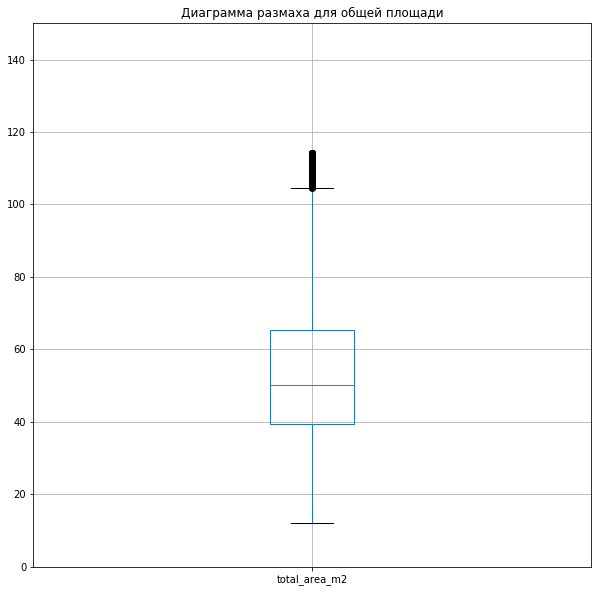

In [68]:
delete_outliers(df,'total_area_m2',1,10,10).set_ylim(0,150)
plt.title('Диаграмма размаха для общей площади')
plt.show()

In [69]:
delete_outliers(df,'total_area_m2',0)['total_area_m2'].mean()

54.32568508435241

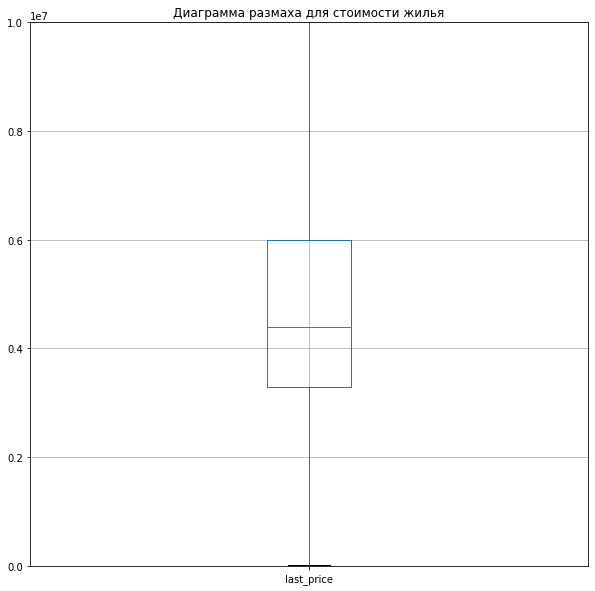

In [70]:
delete_outliers(df,'last_price',1,10,10).set_ylim(0, 10000000)
plt.title('Диаграмма размаха для стоимости жилья')
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>Не забывай пожалуйста подписавать каждый график. Это важный момент всего проект, потому что так быстрее понять о чем идёт речь на графике.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Пофиксил названия графиков.</div>

In [71]:
delete_outliers(df,'last_price',0)['last_price'].mean()

4838942.090946979

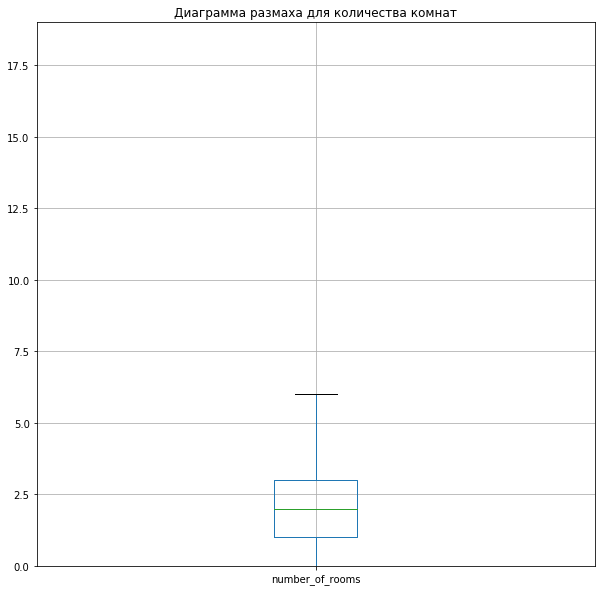

In [72]:
delete_outliers(df,'number_of_rooms',1,10,10).set_ylim(0, 19)
plt.title('Диаграмма размаха для количества комнат')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Готово сенсей.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

😁
   
    
    
</div>

![](https://media.giphy.com/media/QTT5zjhOTO73xahIbk/giphy.gif)

In [73]:
delete_outliers(df,'number_of_rooms',0)['number_of_rooms'].mean()

2.0473259762309

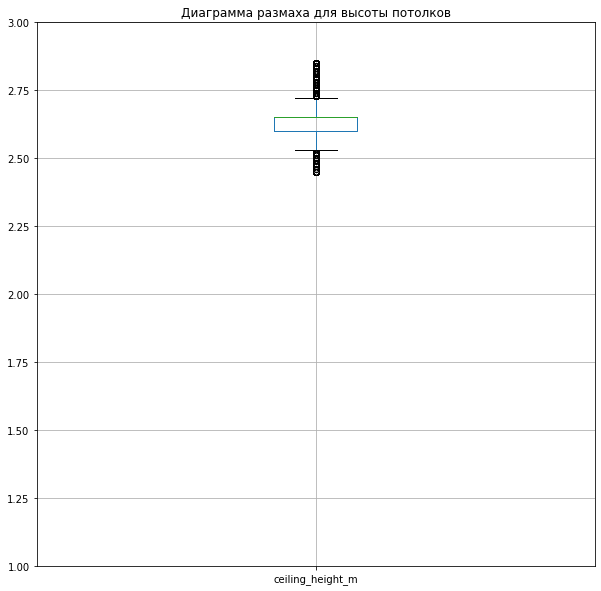

In [74]:
delete_outliers(df,'ceiling_height_m',1,10,10).set_ylim(1, 3)
plt.title('Диаграмма размаха для высоты потолков')
plt.show()

In [75]:
delete_outliers(df,'ceiling_height_m',0)['ceiling_height_m'].mean()

2.6310729468599034

**Вывод:Как мы видим, есть разница между резальтатами без выбросов и с их отсуствием. Общая площадь с выбросами среднее значение 60, после избавления 54, цена с выбросами 6,5 млн средняя, после избавления 4,8 млн, кол-во комнат среднее 2.07, после избавления 2.04, высота потолков средняя 2.73 , после избавления от выбросов 2.63 м.
Мы избавились от выбросов и аномальных значений.**
**Во всех данных есть неадекватные значения, наподобе 0 комнат, высоты потолков в 1 или 100 метров, а также цена квартиры в 12190 рублей. О данных неадекватных значениях мы спросим у сотрудников, предоставивших нам выборку данных, для общего изучения данных, мы не станем убирать эти выбивающиеся значения.**

**Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

(1, 1000)

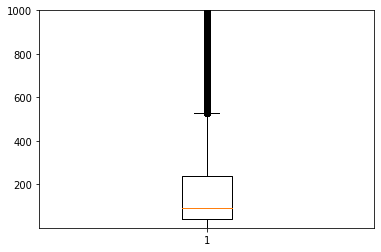

In [76]:
#построим диаграмму размаха
plt.boxplot(df[df['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

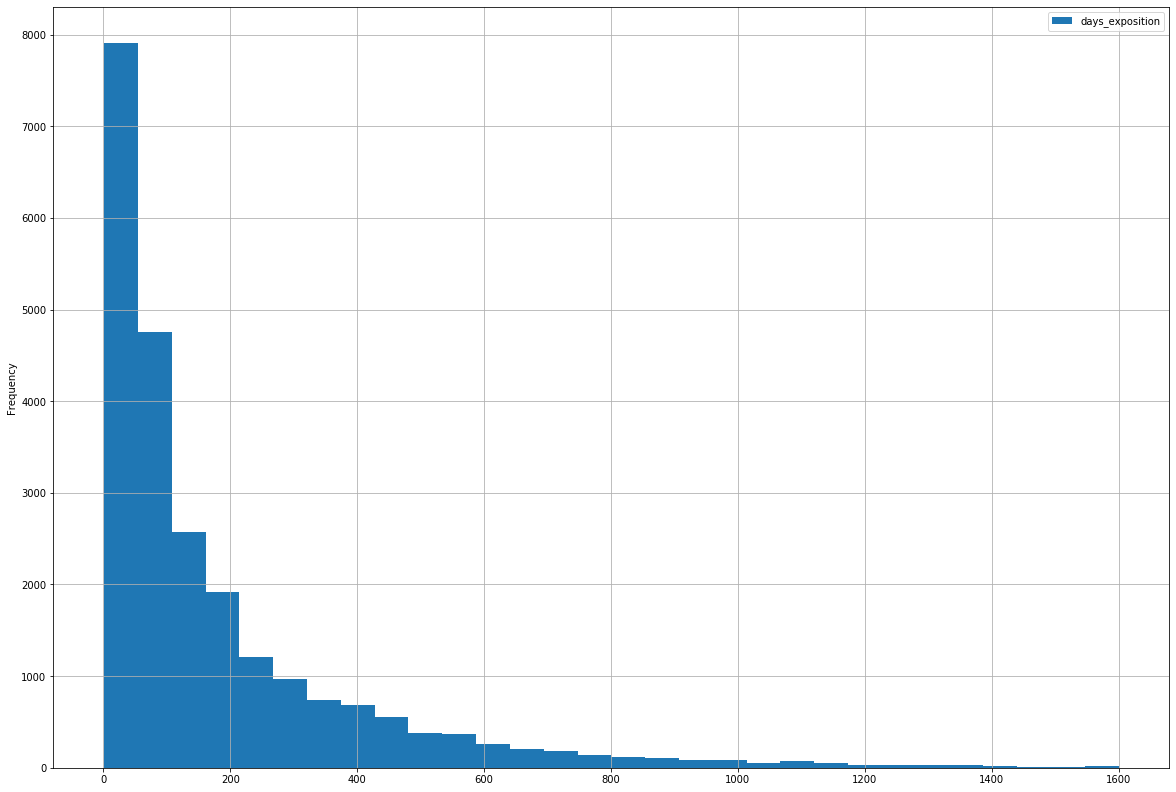

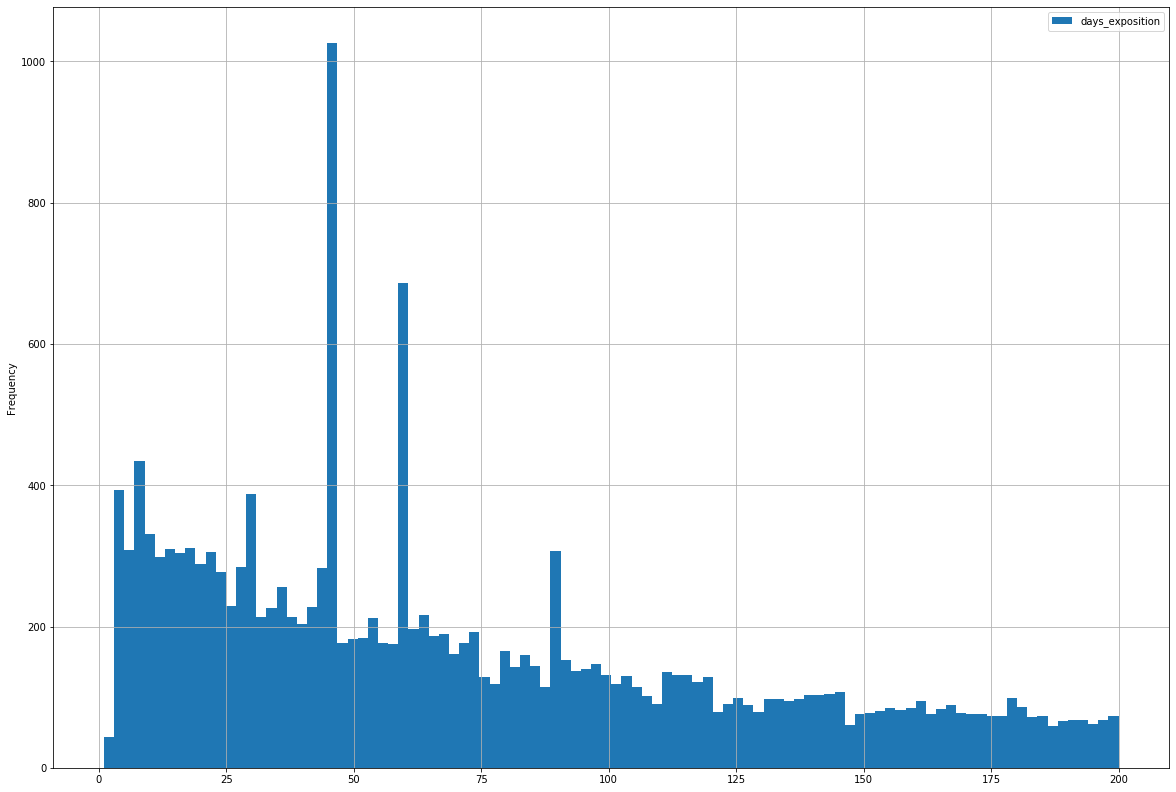

In [77]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, figsize = (20,14), range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, figsize = (20,14), range = (1,200))


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Также мы можем увеличить сам график, чтобы его было удобнее изучать с помощью метода `plt.figure(figsize=(10,7))` или если используешь методы библиотеки `pandas`, в основном всегда есть атрибут `figsize=(10,7)`, который также поможет настроить ширину и высоту графика.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Увеличил размер графиков для наглядности.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

👍    
</div>

In [78]:
#среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe()
#df[df['days_exposition']!=0]['days_exposition'].value_counts()

count    23630.000000
mean       185.871604
std        233.491993
min          1.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

Вывод: гистограмма показывает распределение Пуассона. Среднее значение - 185 дней, медиана - 94 дня. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружились выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления.

В правилах Яндекс Недвижимость указано, что после этих сроков объявление считается неактуальным и снимается автоматически. https://yandex.ru/support/realty/owner/home/add-ads-housing.html 
Считаю что  нам нужно убрать эти значения, вместе с этим есть вероятность что часть таких квартир могли продать в этот временной промежуток.

In [79]:
df[df['days_exposition']==45]

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,...,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,day_of_week_exposition,month_exposition,year_exposition,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
78,Санкт-Петербург,37.0,18.0,10.7,2.65,1,0.0,6,19.0,False,...,NaN,0.0,NaN,Thursday,February,2018,другой,117567.57,0.486486,0.289189
89,поселок городского типа Сиверский,63.0,43.0,9.0,2.50,3,0.0,4,5.0,False,...,NaN,NaN,NaN,Thursday,October,2018,другой,39682.54,0.682540,0.142857
110,деревня Пикколово,72.3,27.4,23.6,2.65,2,0.0,2,3.0,False,...,NaN,NaN,NaN,Friday,September,2017,другой,53250.35,0.378976,0.326418
153,Петергоф,55.0,31.2,8.3,2.57,2,0.0,2,9.0,False,...,0.589,0.0,NaN,Sunday,May,2017,другой,79090.91,0.567273,0.150909
158,городской поселок Янино-1,47.3,27.5,8.5,2.65,2,0.0,2,5.0,False,...,NaN,NaN,NaN,Tuesday,November,2017,другой,65539.11,0.581395,0.179704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,Санкт-Петербург,43.4,30.0,9.1,2.65,2,0.0,1,5.0,False,...,0.202,2.0,0.397,Thursday,January,2018,первый,66820.28,0.691244,0.209677
23613,поселок Парголово,52.0,30.0,9.1,2.65,3,0.0,2,5.0,False,...,NaN,0.0,NaN,Sunday,March,2018,другой,75961.54,0.576923,0.175000
23670,поселок городского типа Синявино,45.6,30.0,9.1,2.80,1,0.0,2,9.0,False,...,NaN,NaN,NaN,Thursday,February,2018,другой,53728.07,0.657895,0.199561
23679,Сосновый Бор,35.0,30.0,9.1,2.65,1,0.0,4,9.0,False,...,NaN,NaN,NaN,Friday,December,2017,другой,71428.57,0.857143,0.260000


**Вывод: не обнаружил общих признаков в обьявлениях, которые были деактивированы через 45 дней, потому есть смысл убрать эти данные из расчетов, ровно как и 60, 90, 30 и 7 дней, так как это аномалии.**

**До того, как мы очистим наши данные от аномалий, нам нужно дать ответ на вопрос, какое количество дней считать нормальным, а какое выбросом на текущий момент до очистки данных. Исходя из метода describe, межквартильный размах - от 45 до 232 дней, исходя же из метода boxplot - диаграмма размаха у нас от минимального значения до примерно 500 дней. Значит необоснованно быстрых значений у нас нет, а необоснованно долгие - от 500 дней и выше. Значит нормальные значения у нас лежат от 1 до 500.**

**На текущий момент мы уже проверили и знаем, что эти данные неправильные, но они нам необходимы, чтобы сравнить с данными, очищенными от аномалий далее.**

**Важно уточнить у сотрудников насчет выбивающихся значений по датам снятия объявлений, чтобы убедиться в том, какие данные необходимо исключить из выборки.**

**Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**


In [80]:
#отфильтруем данные от аномалий и запишем их в новый датафрейм
good_data = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Когда используешь множественную фильтрацию, рекомендую применять метод `loc`. Он читается проще и работает быстрее.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Здесь по совету преподавателя тренировался с query.</div>

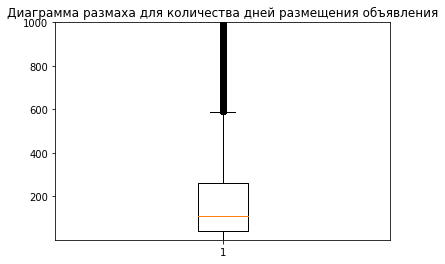

In [81]:
#построим диаграмму размаха
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)
plt.title('Диаграмма размаха для количества дней размещения объявления')
plt.show()

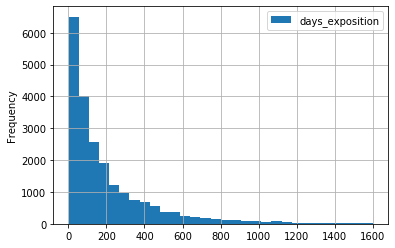

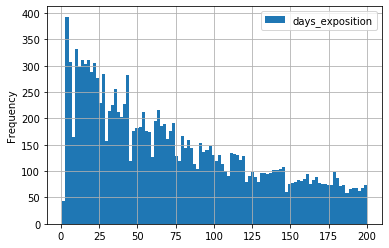

In [82]:
#две гистограммы с разными значениями для days_exposition
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Для этих же графиков можно было также сделать расчет интерквартильного размаха, чтобы не указывать в ручную значения для параметра `range` 
    
</div>

In [83]:
#среднее значение, медиана и межквартильный размах с помощью метода describe
#good_data['days_exposition'].value_counts()
good_data['days_exposition'].describe()

count    21462.000000
mean       199.922561
std        240.476228
min          1.000000
25%         43.000000
50%        112.000000
75%        262.000000
max       1618.000000
Name: days_exposition, dtype: float64

**Вывод: в очищенных данных с аномалиями в значениях меньших медианы получаем бОльшие значения медианы и среднего значения - 112 и 199 соответственно, вместо 94 и 185. Аналогично, теперь нормальные значения располагаются от 1 до 600 дней вместо от 1 до 500 дней.**

**Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

0.3022017014153164

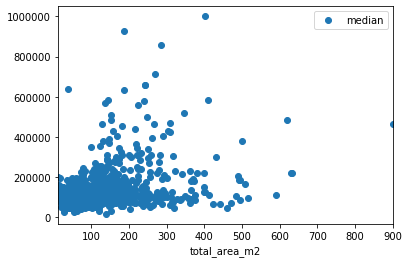

In [84]:
#зависимость цены квадратного метра от общей площади квартиры
pivot_table_total_area_m2 = df.pivot_table(index = 'total_area_m2', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area_m2.columns = ['mean', 'count', 'median']
pivot_table_total_area_m2.plot(y = 'median', style = 'o')

pivot_table_total_area_m2.sort_values('median', ascending = False)

df['total_area_m2'].corr(df['price_per_meter'])

**Зависимость мала, согласно корреляции Пирсона - 0.3, то есть, чем больше площадь тем незначительно повышение цены.**

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Хорошие и логичные комментарии. Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

0.05547053012745786

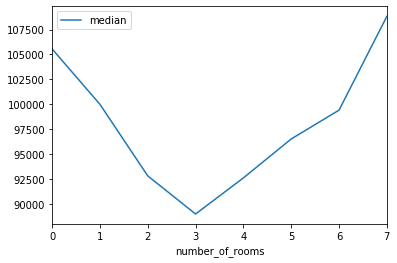

In [85]:
#проверим есть ли зависимость цены квадратного метра от числа комнат
pivot_table_number_of_rooms = df.pivot_table(index = 'number_of_rooms', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_number_of_rooms.columns = ['mean', 'count', 'median']
pivot_table_number_of_rooms.query('count > 50').plot(y = 'median')

pivot_table_number_of_rooms.query('count > 50').sort_values('median', ascending = False)

df['number_of_rooms'].corr(df['price_per_meter'])

**Вывод: чем ближе количество комнат к 3 тем ниже стоимость квадратного метра.**

,mean,count,median
floor,,,
1,81989.310038,2912,81236.815
2,94427.214301,3353,90769.230
3,97716.241191,3065,93457.940
4,99673.380257,2802,93141.140
5,96087.700860,2616,90689.745
6,109474.530123,1302,99380.255
7,109345.104041,1215,100000.000
8,107250.134284,1083,100084.580
9,103936.578124,1050,98017.950


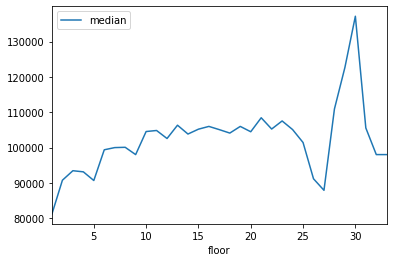

In [86]:
#изучим зависимость цены квадратного метра от расположения этажа
pivot_table_floor = df.query('floor != "другой"').pivot_table(index = 'floor', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor.columns = ['mean', 'count', 'median']
pivot_table_floor.plot(y = 'median')
display(pivot_table_floor)

**Вывод: самые дешёвые квартиры на первых этажах, самые дорогие выше 25 этажа, это похоже на истину, так как квартиры на верхних этажах видовые и стоят значительно дороже, потому что с их окон открывается красивый вид.**

-0.2782925966537628

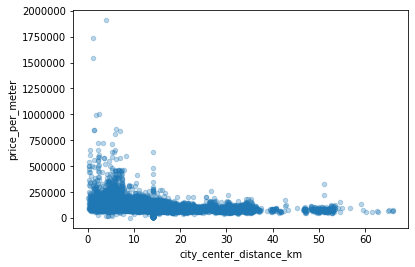

In [87]:
#изучим зависимость цены квадратного метра и удалённости от центра 
df.plot(kind = 'scatter', y = 'price_per_meter', x = 'city_center_distance_km', alpha = 0.3)
df['city_center_distance_km'].corr(df['price_per_meter'])

**Вывод: видим явную зависимость стоимости квадратного метра от близости к центру, чем ближе к центру, тем выше стоимость**

,mean,count,median
day_of_week_exposition,,,
Tuesday,99724.551947,4175,95634.100
Wednesday,99605.973825,3966,95473.810
Thursday,100193.163915,4286,95152.585
Monday,99470.371204,3606,94703.960
Friday,98987.215358,3992,94608.145
Sunday,97763.149486,1692,94594.590
Saturday,99066.258169,1933,93548.390


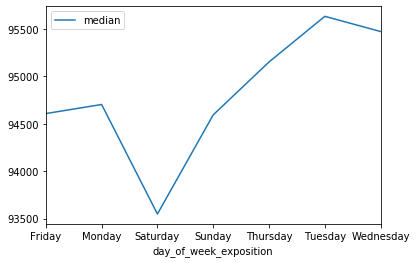

In [88]:
#изучим зависимость цены квадратного метра от даты размещения: дня недели.
pivot_table_weekday_exposition = df.pivot_table(index = 'day_of_week_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

**Вывод: видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно. По субботам стоимость самая низкая.**

**Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены.**

,mean,count,median
year_exposition,,,
2014,124302.355882,136,106901.90
2019,107123.780215,2879,103305.79
2018,97800.065875,8512,95704.32
2015,104719.098517,1173,93396.23
2017,97637.360194,8185,92569.66
2016,98295.372597,2765,91666.67


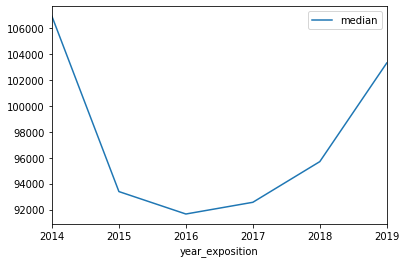

In [89]:
#изучим зависимость цены квадратного метра от даты размещения: года.
pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

**Вывод: видим, что с 2014 до 2016 года цена падала, но далее начала увеличиваться.Мы не рассматриваем сегментацию рынка и по факту стоимость аналогичных квартир могла себя вести абсолютно иначе от года к году.**

**Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.**

In [90]:
locality_pivot_table = df.pivot_table(index = 'town_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
display(locality_pivot_table)

,count,mean
town_name,,
Санкт-Петербург,15721,114849.008793
поселок Мурино,556,85681.762572
поселок Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


In [91]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
town_name,,
Санкт-Петербург,15721,114849.008793


In [92]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
town_name,,
Выборг,237,58141.909325


**Вывод: самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, а самая низкая стоимость в городе Выборг.**

**Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.**

,price_per_meter
city_center_distance_km,
0,187324.130233
1,166603.755542
2,146662.860033
3,129416.344525
4,137475.497056
5,146979.232640
6,152277.893383
7,141399.731351
8,120581.349925


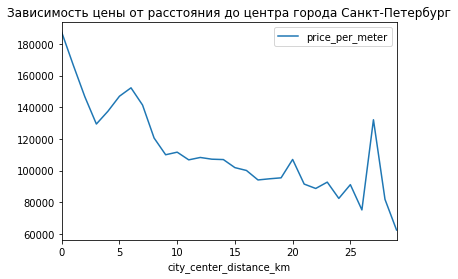

In [93]:
df['city_center_distance_km'] = df['city_center_distance_km'].astype('int64')
pivot_table_km = df.query('town_name == "Санкт-Петербург"').pivot_table(index = 'city_center_distance_km', values = 'price_per_meter', aggfunc = 'mean')
pivot_table_km.plot()
plt.title('Зависимость цены от расстояния до центра города Санкт-Петербург')
pivot_table_km


**Вывод: судя по графику центром считать будем радиус в 3 километра**

**Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Ориентировочно это 8–10 км, потому что дальше идёт в том числе спад и длительная стагнация стоимости.
    
</div>

In [94]:
#выделим квартиры в центре, беря за радиус 3 км
center_spb_df = df.query('city_center_distance_km <= 3 and town_name == "Санкт-Петербург"')

0.0017674542335402944

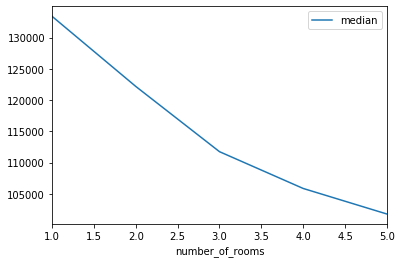

In [95]:
#зависимость стоимости квадратного метра от количества комнат
center_spb_rooms = center_spb_df.pivot_table(index = 'number_of_rooms', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_df['number_of_rooms'].corr(center_spb_df['price_per_meter'])

**Вывод: в центре Питера чем меньше комнат, тем дороже стоимость квадратного метра, коэффициент корреляции 0.0017, настолько мал, что нет смысла судить о какой то связи**

,mean,count,median
floor,,,
1,123509.583049,164,107508.770
2,141070.024152,277,116406.250
3,135629.844599,237,113333.330
4,149300.636444,239,116883.120
5,150374.214848,165,119531.250
6,188504.996458,48,128735.905
7,194016.462857,14,133717.450
8,246071.540000,5,180241.460
9,345015.948000,5,163846.150


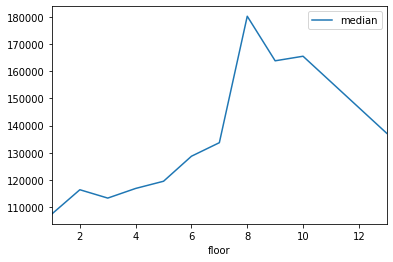

In [96]:
#зависимость стоимости квадратного метра от этажа
center_spb_floor_category = center_spb_df.query('floor != "другой"').pivot_table(index = 'floor', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

**Вывод: квартиры на верхних этажах дороже, чем на нижних, на первом этаже самые дешёвые, так как внизу подвал, а значит сырость и холод, самые дорогие на 8, далее идёт ценовая коррекция, я думаю это может быть связано с неликивидностью квартир на последних этажах. На верхних этажах квартиры меньше пользуются спросом из-за шума(тех этаж или лифтовая, крыша) и холода. В середине как правило квартиры пользуются большим спросом, так как там и тепло и шума меньше, опять же квартиры на верхних этажах (с 6 по 10) показывают рост стоимости квадратного метра, я думаю это может быть связано с тем, что это видовые квартиры на фоне окружающей застройки.**

-0.14742490037185574

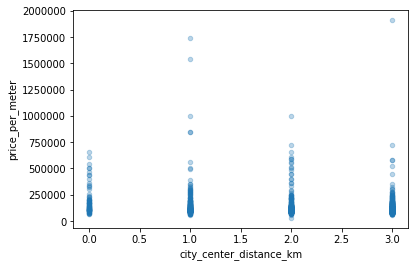

In [97]:
#зависимость стоимости квадратного метра от удаленности от центра
center_spb_df.plot(kind = 'scatter', y = 'price_per_meter', x = 'city_center_distance_km', alpha = 0.3)

center_spb_df['city_center_distance_km'].corr(center_spb_df['price_per_meter'])

**Вывод: ближе к центру (1 км) цена дороже и с увеличением расстояния дешевле. В самом центре цены на квадратный метр дешевле, чем в удалении на 1 км, я думаю это связано с тем, что у таких квартир могут быть недостатки - старое здание, объект культурного наследия, а значит старые коммуникации, замена или ремонт которых чаще стоит дороже самой квартиры, ограничение на перепланировку, большой шум и грязь, отсутсвие придомовой территории, из-за большого количества муниципальных зданий поблизости. Чаще такие квартиры здают посуточно, либо коммандировочным, для них это временное решение, поэтому все эти факторы не имеют для них значение.**

,mean,count,median
day_of_week_exposition,,,
Monday,145551.499235,170,121354.325
Saturday,161508.488289,76,120568.085
Friday,139253.095094,212,117984.375
Wednesday,144333.466495,194,114903.120
Tuesday,148325.539788,189,114209.830
Sunday,143555.436716,67,110843.370
Thursday,147413.473546,251,110132.160


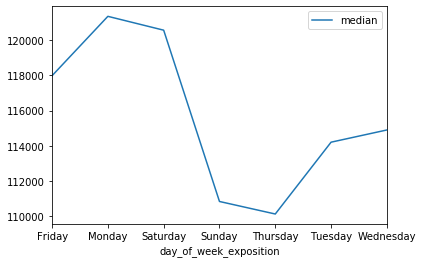

In [98]:
#зависимость стоимости квадратного метра от дня недели размещения объявления
center_spb_weekday_exposition = center_spb_df.pivot_table(index = 'day_of_week_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')

center_spb_weekday_exposition.sort_values('median', ascending = False)

**Вывод: ситуация отличается от всей выборки, здесь в четверг самые низкие цены и в понедельник самые высокие.**

,mean,count,median
month_exposition,,,
April,168983.339224,116,123095.125
October,143129.501702,94,121978.410
December,162850.307831,83,121568.630
March,149574.931102,118,117409.565
January,147760.544286,77,117244.900
February,141961.199612,129,116406.250
September,155582.053168,101,116054.160
November,136308.801545,123,112639.590
July,137695.003535,99,112195.120


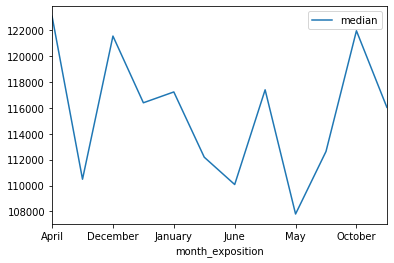

In [99]:
#зависимость стоимости квадратного метра от месяца размещения объявления
center_spb_month_exposition = center_spb_df.pivot_table(index = 'month_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')

center_spb_month_exposition.sort_values('median', ascending = False)

**Вывод: пиковые значения отмечены в апреле, декабре и октябре, самые низкие значения в мае и июне месяце, полагаю что это связано с майскими праздниками и снижением деловой активности в первом месяце лета из-за старта сезона отпусков.**

,mean,count,median
year_exposition,,,
2019,173593.527874,127,131432.750
2018,140129.848647,340,117898.845
2017,141410.707823,418,114579.495
2016,135593.316735,147,109090.910
2015,154054.776186,118,107055.590


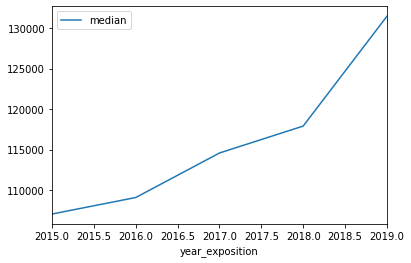

In [100]:
#зависимость стоимости квадратного метра от года размещения объявления
center_spb_year_exposition = center_spb_df.pivot_table(index = 'year_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y = 'median')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

**Вывод: в отличие от общей выборки цены планомерно растут, полагаю что это может быть связано с мягкой денежно кредитной политикой, стоимость привлечения средств дешевле, поэтому защитные активы дорожают по отношению к инфляционному активу.**

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>Давай постараемся автоматизировать построение графиков через цикл `for`. 
    
Почему это важно? 
    
- экономим своё время
- оптимизируем код
- делаем работу презентабельнее
    
Выбери любой участок кода где это сделать целесообразнее всего.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Логически понимаю через цикл будет проще, а вот механику, как всё это написать с таким количеством графиков не могу понять, всю голову сломал, ничего не работает(.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно было бы сравнить центр и весь город в целом, для наглядности наших расчетов.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Понял, тогда оставлю пример  ниже и попытаюсь описать, что здесь происходит.
    
</div>

In [103]:
cols = ["living_area_m2", "total_floors_in_house", "total_living_area_ratio", "total_area_m2", "nearest_park_distance_km"]

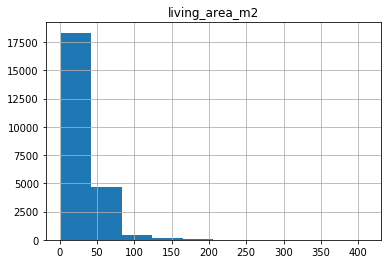

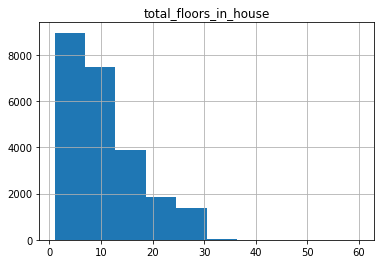

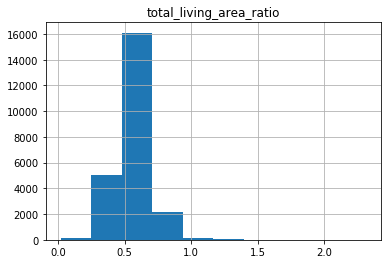

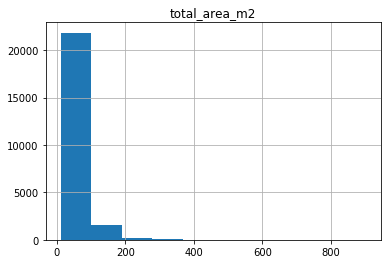

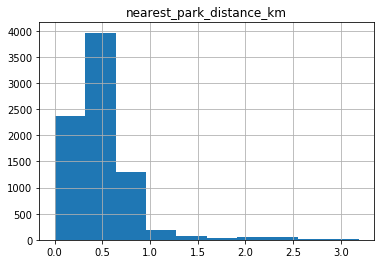

In [104]:
for col in cols:
    df[col].hist()
    plt.title(col)
    plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

И так, что мы делаем: 

- создаем список столбцов
- проходимся циклом `for` по каждому
- выбираем столбец в датафрейме
- визуализируем этот столбец
- добавляем тайтл
- визуализируем 
    
Можно также добавить нормальные названия графиков, например используя не список, а словарь. Где в ключах будет название столбца, а в значениях будет нормальное наименование графика.
    
</div>

## Общий вывод

**Мы обработали полученный архив - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 500 дней. Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено. В данном случае имело место постоянное удорожание стоимости, начиная с 2015 года по текущий момент. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 3 километров.**

**Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Т.е. например в то время, когда средняя стоимость метра по рынку в 2016-2017 годах была наиболее низкой, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать. Именно об этом нам и говорят данные, полученные при изучении единственного сегмента квартир - находящихся в радиусе 3 км в центре Питера.**

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
    
Достаточно детально проделанная работа и это не может не радовать 😊
    
Давай поправим мои комментарии и будем двигаться дальше.
    
Если у тебя вдруг есчть какие–либо вопросы, то я с радостью отвечу на них 😊
       

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Здорово, что достаточно оперативно поправили мои комментарии и сделали наш проект еще лучше.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [X]  определены пропущенные значения
- [X]  заполнены пропущенные значения
- [X]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [X]  есть пояснение, в каких столбцах изменены типы и почему
- [X]  посчитано и добавлено в таблицу: цена квадратного метра
- [X]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [X]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [X]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [X]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [X]  построены гистограммы для каждого параметра
- [X]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [X]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [X]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [X]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [X]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [X]  в каждом этапе есть выводы
- [X]  есть общий вывод